In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from sklearn.decomposition import PCA
import scipy as sp
import scipy.cluster.hierarchy as hc

In [51]:
def plot_feature_matrix(df, concept_names=None, scaled=False):
    if scaled:
        scaler = MaxAbsScaler()
        X = scaler.fit_transform(df)
    else:
        X = df

    if concept_names is None:
        concept_names = df.columns.tolist()
        
    sns.set(font_scale = 2)
    plt.figure(figsize = (20,20))
    ax = sns.heatmap(X,
                     cbar = True,
                     yticklabels = df.index.tolist(),
                     xticklabels = concept_names,
                     linewidths=0.1, linecolor='gray')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', rotation_mode='anchor');
    

def plot_single_task(df, task_idx, scaled=False):
    if scaled:
        scaler = MaxAbsScaler()
        X = scaler.fit_transform(df)
    else:
        X = df

    sns.set(font_scale = 2)
    plt.figure(figsize = (20,0.5))
    ax = sns.heatmap(X[task_idx,:].reshape(1,-1),
                     cbar = False,
                     yticklabels = False,
                     xticklabels = df.columns.tolist(),
                     linewidths=0.1, linecolor='gray')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', rotation_mode='anchor');
    

def cluster_plot(df, title, labels):
    sns.set(font_scale=2)
    rdm_condensed = sp.spatial.distance.pdist(df.T, metric='correlation')
    rdm = sp.spatial.distance.squareform(rdm_condensed)
    linkage = hc.linkage(rdm_condensed, method='average', optimal_ordering=True)
    ax = sns.clustermap(rdm, row_linkage=linkage, col_linkage=linkage,
                        yticklabels=labels, xticklabels=labels,
                       figsize=(20,20))
    ax.fig.suptitle(title, fontsize=40, y=1.05)
    return ax

def cluster_plot(df, title, labels, similarity_metric, method, vmin=None, vmax=None):
    sns.set(font_scale=1)
    rdm_condensed = sp.spatial.distance.pdist(df.T, metric=similarity_metric)
    rdm = sp.spatial.distance.squareform(rdm_condensed)
    linkage = hc.linkage(rdm_condensed, method='average', optimal_ordering=True)
    ax = sns.clustermap(rdm, row_linkage=linkage, col_linkage=linkage,
                        yticklabels=labels, xticklabels=labels,
                       figsize=(13,13), vmin=vmin, vmax=vmax, cbar_pos=None,
                       linewidths=0.05, linecolor='gray')
    ax.fig.suptitle(title, y=1.05)
    return(ax, rdm)

In [52]:
# Define paths
proj_dir = '../..'
features_dir = os.path.join(proj_dir, 'X_features', 'byTask')
analysis_name = 'analysis_em-bySession'

# Load main feature set
X = pd.read_csv(os.path.join(features_dir, 'X_all.csv'), index_col=0)
col_order = ['right hand response execution',
             'left hand response execution',
             'response alternatives',
             'visual number recognition',
             'visual letter recognition',
             'visual word recognition',
             'visual object recognition',             
             'visual shape perception',
             'visual scene perception',
             'face perception',
             'visual motion perception',
             'biological motion',
             'feedback processing',
             'interference resolution',
             'motor planning',
             'visual imagery',
             'motor imagery',
             'working memory maintenance',
             'updating',
             'mental arithmetic',
             'semantic retrieval',
             'sentence processing',
             'expectation violation',
             'narrative',
             'theory of mind',
             'autobiographical recall',
             'emotion recognition',
             'positive emotion',
             'negative emotion',
             'visual working memory',
             'spatial selective attention',
             'auditory tone discrimination',
             'word generation',
             'task switching',
             'inhibition',
             'phonological working memory']
X = X[col_order]
features = X.columns.tolist()
tasks = X.index.tolist()

# Load cognitive and perceptual-motor feature sets
X_cognitive = pd.read_csv(os.path.join(features_dir, 'X_cognitive.csv'), index_col=0)
cognitive_features = X_cognitive.columns.tolist()

X_perceptual_motor = pd.read_csv(os.path.join(features_dir, 'X_perceptualmotor.csv'), index_col=0)
perceptual_motor_features = X_perceptual_motor.columns.tolist()

# Create plot-friendly names for the features
features_labeled = []
for feature in features:
    if feature in cognitive_features:
        name = feature + ' (C)'
    elif feature in perceptual_motor_features:
        name = feature + ' (PM)'
    else:
        print(feature + ' not in either class')
    features_labeled.append(name)

# Visualize feature matrix

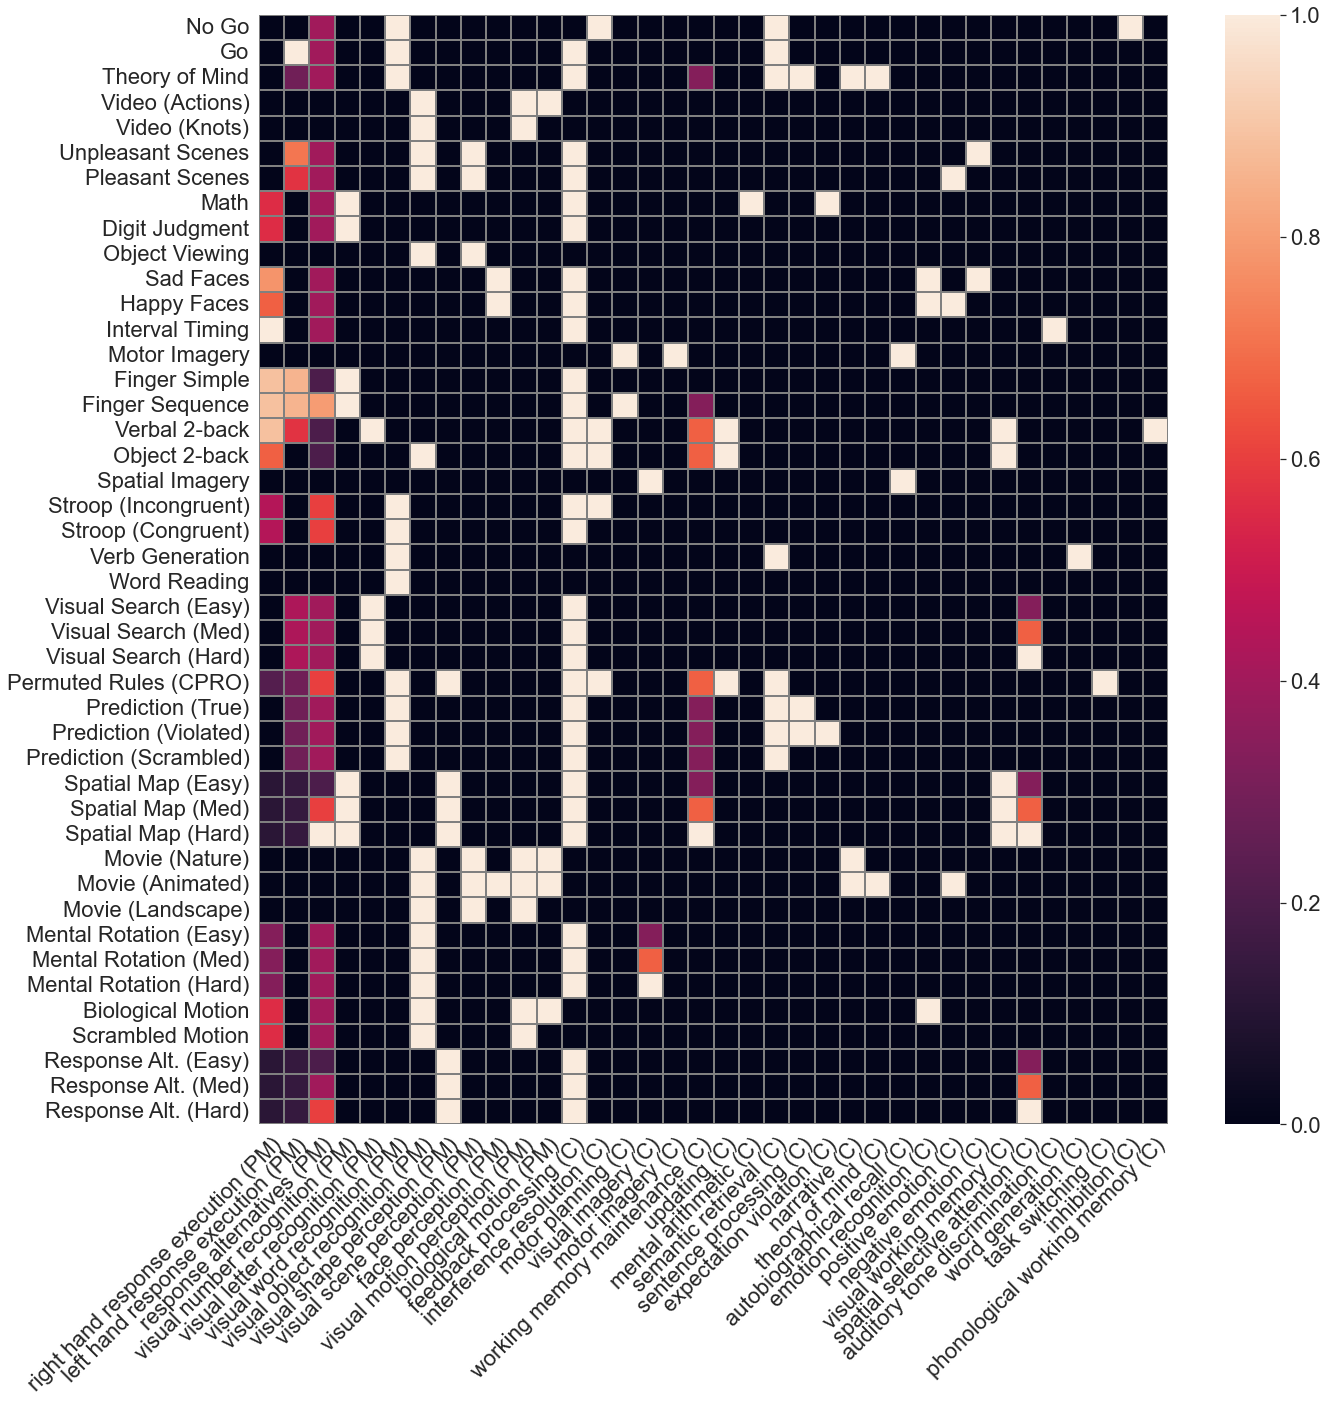

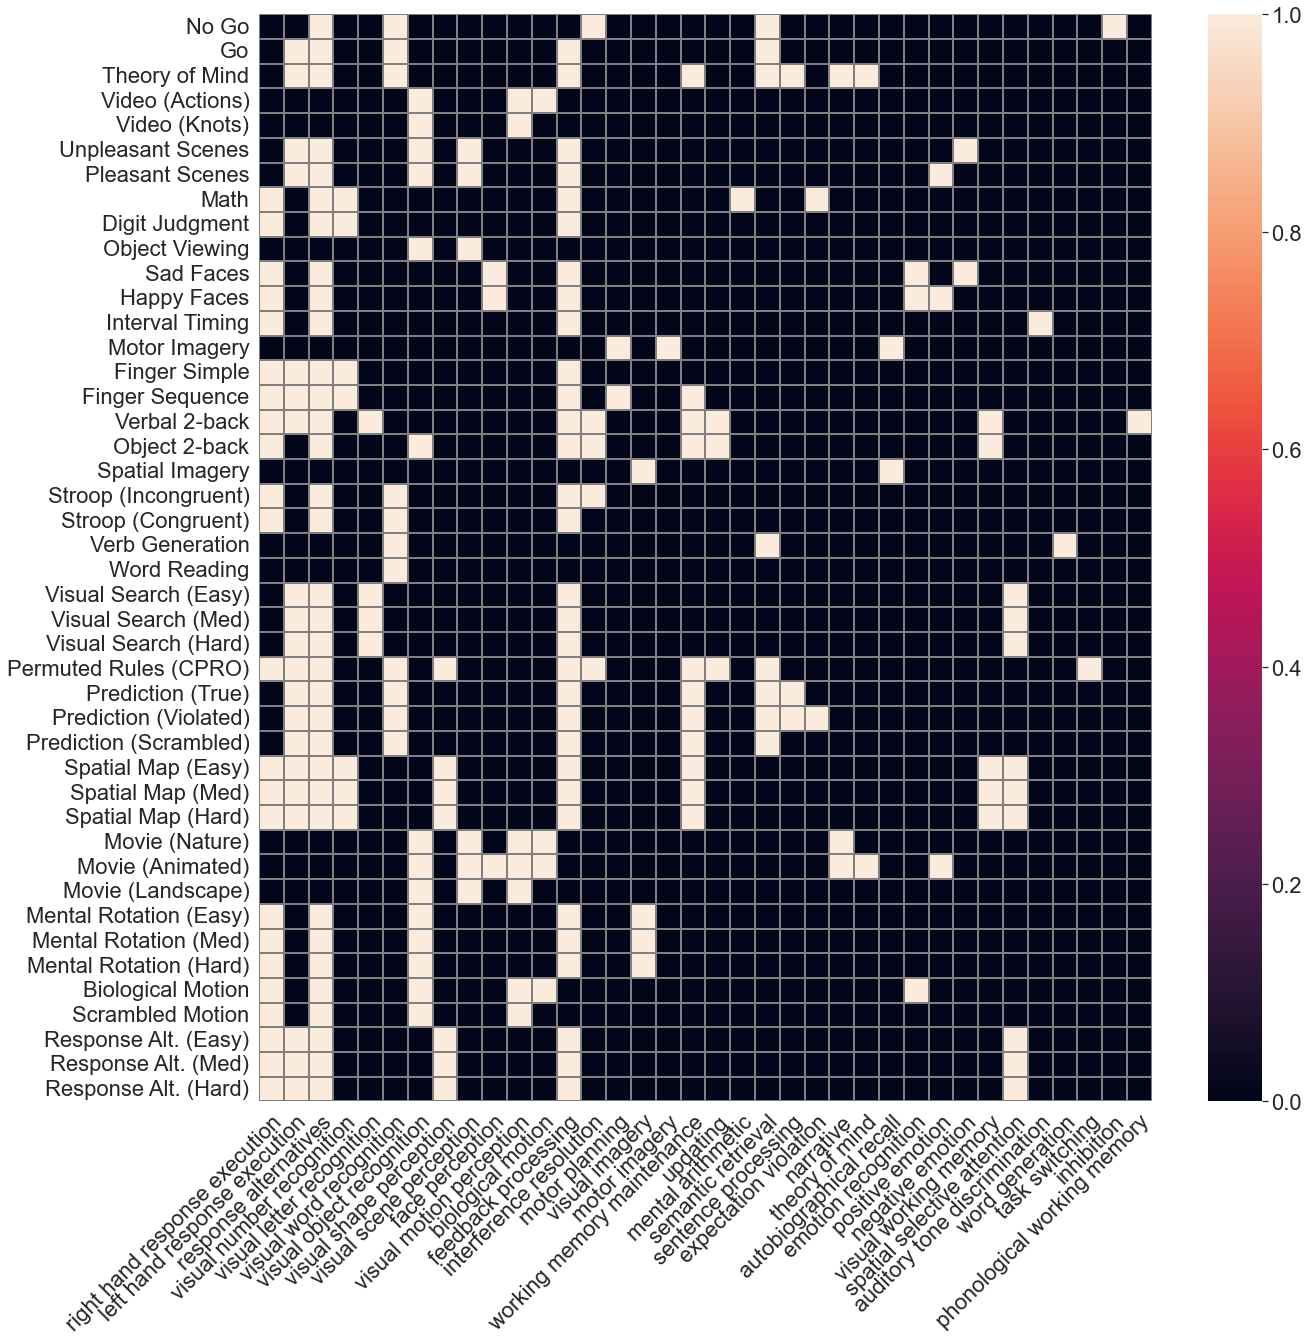

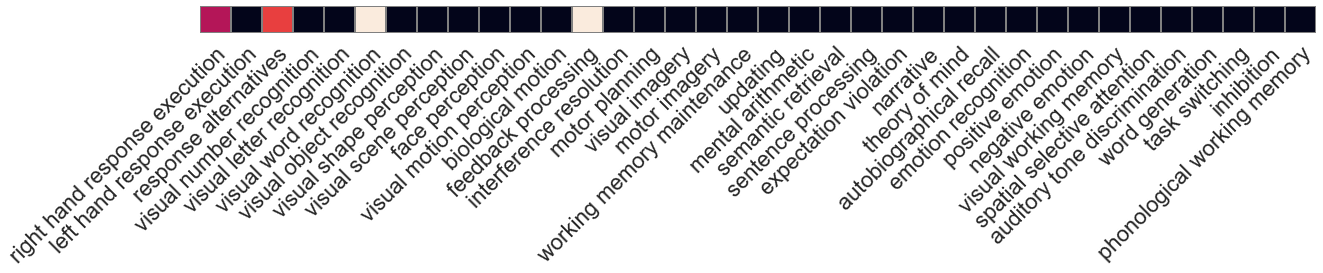

In [53]:
# Visualize feature matrix (scaled) 
filetype = 'pdf'

plot_feature_matrix(X, concept_names=features_labeled, scaled=True)
plt.tight_layout()

figdir = os.path.join(proj_dir, f'figures/{analysis_name}/features')
if not os.path.exists(figdir):
    os.makedirs(figdir)
plt.savefig(os.path.join(figdir, 'feature_matrix.%s' % filetype))

# Visualize feature matrix (clipped for visualization)
X_clipped = X.where(X <= 1, 1)
plot_feature_matrix(X_clipped)

# Visualize a single task
task_idx = 20
plot_single_task(X, task_idx, scaled=True)

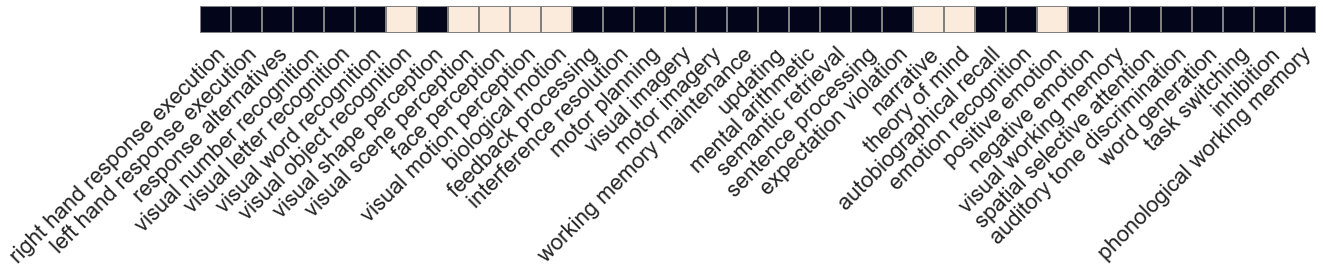

In [50]:
# Visualize a single task
task_idx = 34
plot_single_task(X, task_idx, scaled=True)

# PCA of feature matrix

In [10]:
def plot_pca(Xproj):
    pc1 = Xproj[:,0]
    pc2 = Xproj[:,1]
    plt.scatter(pc1, pc2, color='b')  
    plt.axis('equal')
    plt.xlabel('PC 1', fontsize=15)
    plt.ylabel('PC 2', fontsize=15)
     
def pca_and_plots(X, n_components=None, title=''):
    plt.style.use('seaborn-white')

    if not n_components:
        n_components = np.min(X.shape)
    pca = PCA(n_components=n_components)
    Xproj = pca.fit_transform(X)
    
    ## plots
    plt.figure(figsize=(16,5)) 
    
    # explained variance
    plt.subplot(1, 3, 1); 
    scree = pca.explained_variance_ / np.sum(pca.explained_variance_)
    plt.plot(scree)
    plt.title(title, fontsize=15)
    plt.xlabel('PCs', fontsize=15)
    plt.ylabel('Proportion Explained Variance', fontsize=15)
    plt.xticks(np.arange(0,36,5), fontsize=15)
    plt.yticks(np.arange(0,0.3,0.05), fontsize=15)

    # scree
    plt.subplot(1, 3, 2);
    plt.plot(np.cumsum(scree))
    plt.title('CDF', fontsize=15)
    plt.xlabel('PCs', fontsize=15)
    plt.xticks(np.arange(0,37,5), fontsize=15)
    plt.yticks(np.arange(0.2,1.1,0.2), fontsize=15)
    
    # first two PCs
    plt.subplot(1, 3, 3);
    plot_pca(Xproj)
    plt.title(title, fontsize=15)
    
    return pca, Xproj

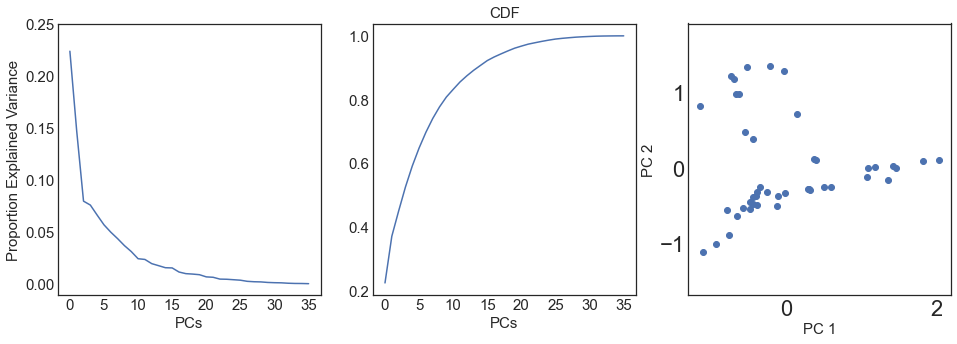

In [11]:
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)
pca_and_plots(X_scaled);
plt.savefig(os.path.join(figdir, 'concept_pca.%s' % filetype))

# Task and Concept Similarity based on Annotations

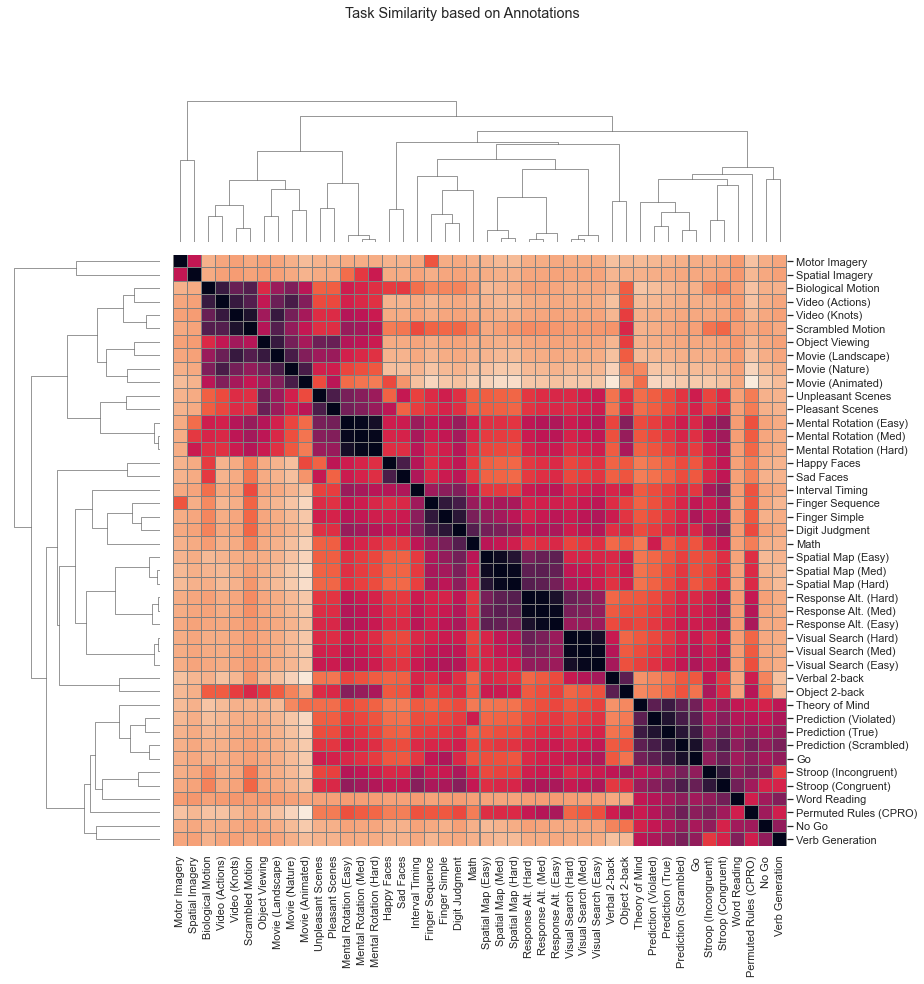

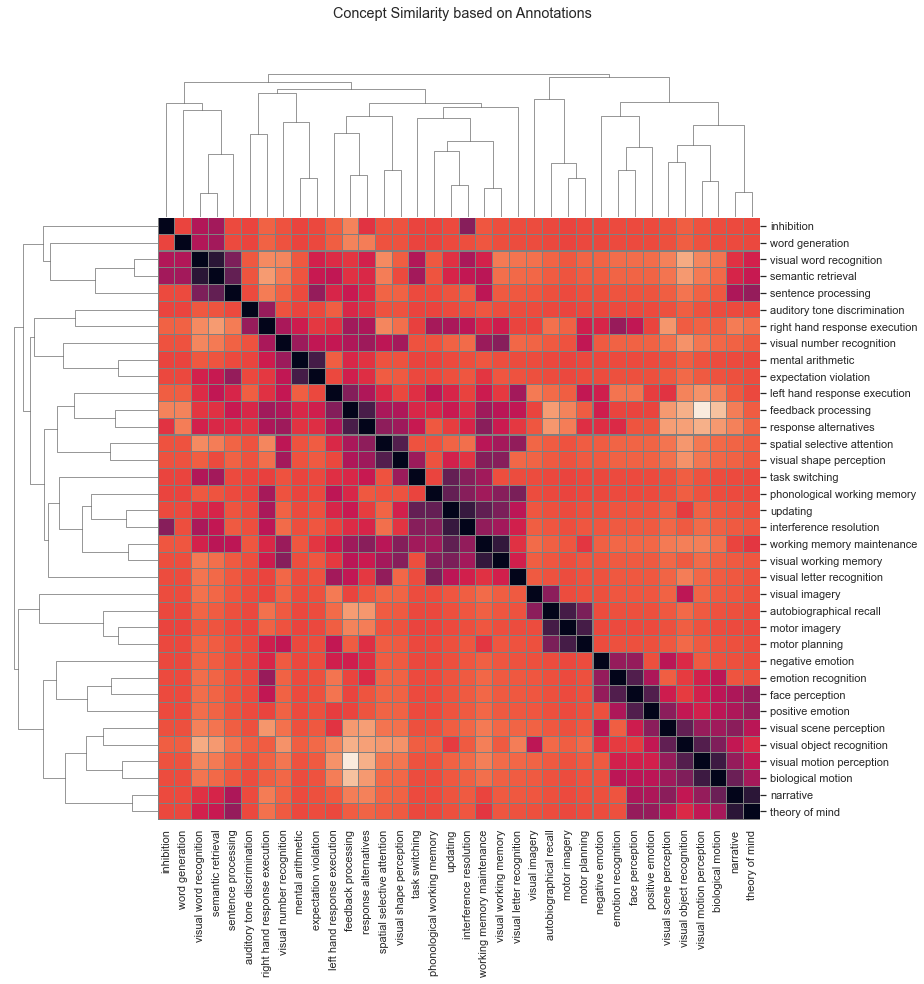

In [18]:
feature_set = 'all'
annotations_df = pd.read_csv(os.path.join(features_dir, 'X_%s.csv' % feature_set), index_col=0)
concepts = annotations_df.columns.tolist()
tasks = annotations_df.index.tolist()
task_ax, task_rdm = cluster_plot(X_scaled.T, 'Task Similarity based on Annotations', tasks,
                                 similarity_metric='correlation',
                                 method='average'
                      )
plt.tight_layout()

task_reordered_indices = task_ax.dendrogram_row.reordered_ind
concept_ax, concept = rdm = cluster_plot(annotations_df, 'Concept Similarity based on Annotations', concepts,
                                         similarity_metric='correlation',
                                         method='average'
                         )
concept_reordered_indices = concept_ax.dendrogram_row.reordered_ind